**Analiza podatkov pri programiranju 1: Najbolj popularni animeji**
Naložimo knjižnico in podatke

In [37]:
# naložimo knjižnice
import numpy as np 
import pandas as pd
import os

# naložimo razpredelnico, s katero bomo delali
anime = pd.read_csv('anime/anime.csv')

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline


<class 'str'>


In [3]:
# vidimo, v kateri mapi se trenutno nahajamo -> specificiramo pot, kjer naj pd isce .csv datoteko
os.getcwd()

'c:\\Users\\rosel\\Desktop\\Analiza-podatkov-PROG1-'

In [4]:
anime

,naslov,opis,type,stevilo_epizod,ocena,start_date,end_date,stevilo_glasov,rating
0,Fullmetal Alchemist: Brotherhood,"&quot;In order for something to be obtained, s...",TV,64,9.23,04-05-09,07-04-10,"1,614,799",R
1,Hunter x Hunter (2011),Hunter x Hunter is set in a world where Hunter...,TV,148,9.11,10-02-11,09-24-14,"1,052,750",PG-13
2,Steins;Gate,The self-proclaimed mad scientist Rintarou Oka...,TV,24,9.11,04-06-11,09-14-11,"1,331,223",PG-13
3,Kimi no Na wa.,"Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1,9.09,08-26-16,08-26-16,"1,129,347",PG-13
4,Shingeki no Kyojin Season 3 Part 2,Seeking to restore humanity’s diminishing hope...,TV,10,9.07,04-29-19,07-01-19,"436,927",R
...,...,...,...,...,...,...,...,...,...
1955,Kakegurui××,As Yumeko Jabami&#039;s fame grows and the rep...,TV,12,7.43,01-09-19,03-27-19,"207,560",R
1956,Gensoumaden Saiyuuki Movie: Requiem - Erabarez...,The gang is traveling along when they find a g...,Movie,1,7.43,08-18-01,08-18-01,"8,062",PG-13
1957,Sabage-bu!,"Draw your weapons and take aim, because Sabage...",TV,12,7.43,07-06-14,09-21-14,"111,277",PG-13
1958,Micchiri Neko March,A music video created for the Micchiri Neko ch...,Music,1,7.43,04-02-13,04-02-13,"1,590",G


Sledi proučevanje podatkov

In [5]:
# poglejmo najprej povprečno oceno animejev, da vidimo, kakšno filtriranje glede na ocene je najbolj smiselno
# najprej izoliramo stolpec ocen
anime_ocene = anime['ocena'] 
#nato izračunamo povprečno vrednost
anime_ocene.mean()

7.844627551020409

In [6]:
# naravno se zdi, da animeje grupiramo po (maturity) rating-u ter nato izračunamo povprečno oceno po posamezni skupini, da vidimo, če obstaja kakšna korelacija
anime_group_by_rating = anime.groupby('rating')
# pogledamo povprečje posamezne skupine za ocene in število epizod
anime_group_by_rating.mean()

,stevilo_epizod,ocena
rating,,
-,5.700000,7.972000
G,18.022989,7.756264
PG,47.808219,7.706027
PG-13,17.011419,7.853923
R,12.971910,7.907528
R+,13.451923,7.798750
Rx,3.470588,7.562353


Ugotovimo, da maturity rating ne vpliva na oceno, kar lahko interetiramo kot da tako mladi kot stari ljudje uživajo v gledanju animejev.

In [7]:
# zanima nas, ali obstaja korelacija med oceno in številom epizod
# prepostavljamo, da imajo bolj popularni animeji večje število epizod
# pogrupiramo jih po številu epizod
anime.groupby('stevilo_epizod').size()

stevilo_epizod
1       669
2        79
3        48
4        44
5        16
       ... 
358       1
366       1
373       1
500       1
1787      1
Length: 112, dtype: int64

In [8]:
# izračunamo povprečno oceno posamezne skupine animejev, glede na število epizod
anime.groupby('stevilo_epizod').mean()

,ocena
stevilo_epizod,
1,7.808535
2,7.768228
3,7.742708
4,7.807955
5,7.688125
...,...
358,7.820000
366,7.870000
373,7.800000


Razen animeja s 500 epizodami lahko rečemo, da število epizod ne vpliva na gledanost oz. oceno. Očitno imajo gledalci zelo raznolike preference in za vsakogar se najde nekaj, kar mu odgovarja.

In [9]:
# poglejmo število animejev glede na vrsto/zvrst (type)
# previdevamo, da je TV najbolj popularen tip
anime_group_by_type = anime.groupby('type')
anime_group_by_type.size()

type
Movie      432
Music       21
ONA         68
OVA        271
Special    190
TV         978
dtype: int64

In [10]:
# zanima nas, ali obstaja kakšna povezava med tem, kakšne vrste je anime in tem, kakšno oceno ima
anime_group_by_type['ocena'].mean()

# presenetljiva ugotovitev je, da se povprečna ocena glede na tip ne razlikuje

type
Movie      7.859398
Music      7.648095
ONA        7.750882
OVA        7.761218
Special    7.759895
TV         7.888415
Name: ocena, dtype: float64

In [11]:
# zanima nas, kateri animeji so zelo nadpovprečni oz podpovprečni ter koliko jih je
podvoprecni = anime['ocena'] < 7.5
nadpovprecni = anime['ocena'] > 9
anime[podvoprecni | nadpovprecni]

,naslov,opis,type,stevilo_epizod,ocena,start_date,end_date,stevilo_glasov,rating
0,Fullmetal Alchemist: Brotherhood,"&quot;In order for something to be obtained, s...",TV,64,9.23,04-05-09,07-04-10,"1,614,799",R
1,Hunter x Hunter (2011),Hunter x Hunter is set in a world where Hunter...,TV,148,9.11,10-02-11,09-24-14,"1,052,750",PG-13
2,Steins;Gate,The self-proclaimed mad scientist Rintarou Oka...,TV,24,9.11,04-06-11,09-14-11,"1,331,223",PG-13
3,Kimi no Na wa.,"Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1,9.09,08-26-16,08-26-16,"1,129,347",PG-13
4,Shingeki no Kyojin Season 3 Part 2,Seeking to restore humanity’s diminishing hope...,TV,10,9.07,04-29-19,07-01-19,"436,927",R
...,...,...,...,...,...,...,...,...,...
1955,Kakegurui××,As Yumeko Jabami&#039;s fame grows and the rep...,TV,12,7.43,01-09-19,03-27-19,"207,560",R
1956,Gensoumaden Saiyuuki Movie: Requiem - Erabarez...,The gang is traveling along when they find a g...,Movie,1,7.43,08-18-01,08-18-01,"8,062",PG-13
1957,Sabage-bu!,"Draw your weapons and take aim, because Sabage...",TV,12,7.43,07-06-14,09-21-14,"111,277",PG-13
1958,Micchiri Neko March,A music video created for the Micchiri Neko ch...,Music,1,7.43,04-02-13,04-02-13,"1,590",G


In [12]:
# sedaj jih še preštejemo
anime.groupby(anime.ocena < 7.5).size()

ocena
False    1712
True      248
dtype: int64

In [13]:
anime.groupby(anime.ocena > 9).size()

ocena
False    1950
True       10
dtype: int64

Risanje grafov
Za lažjo grafično predstavo analiziranih podatkov narišemo grafe, ki predstavljajo naše ugotovitve.
Uporabljamo predvsem stolpični diagram, saj želimo primerjati podatke po diskretnih (kategorničnih) spremenljivkah.

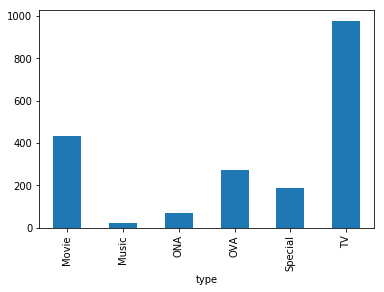

In [16]:
# narišemo graf, ki prikazuje število animejev za posamezen tip
anime_group_by_type.size().plot.bar(x='tip', y='število animejev')

Najbolj popularen tip je TV, najmanj pa glasbeni videi.

In [ ]:
Ta graf nam jasno pokaže, da so ciljna publika večinoma najstniki med 13-15 let, ne preseneča nas pa tudi, da je hentai zelo popularna zvrst.

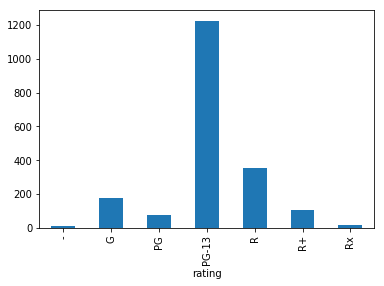

In [17]:
# narišemo graf, ki predtsavlja število animejev glede na maturity rating
anime_group_by_rating.size().plot.bar(x='ocena', y='stevilo animejev')

In [ ]:
# zanima nas korelacija med oceno in številom glasov
# domnevamo, da so bili animeji z boljšo oceno večkrat ocenjeni
# predvidevamo, da ljudje ne radi dajejo slabih ocen, zato so animeji s slabšo oceno manjkrat ocenjeni

# ker smo naleteli na problem, da so objekti števila glasov tipa str, mi pa želimo številski tip (int ali float), potakom spremenimo tip

# narišemo razsevni diagram, ki prikazuje povezavo med oceno in številom glasov


In [78]:
for i in anime['stevilo_glasov'].index:
    if not(isinstance(anime['stevilo_glasov'][i], int)):
        
        #anime['stevilo_glasov'][i] = int(anime['stevilo_glasov'][i].replace(',', ''))
        #anime['stevilo_glasov'][i] = int(anime['stevilo_glasov'][i].replace(',', ''))
        #anime['stevilo_glasov'][i] = float(anime['stevilo_glasov'][i])
print(type(anime['stevilo_glasov'][0]))

AttributeError: 'float' object has no attribute 'replace'

In [73]:
print(type(anime['stevilo_epizod'][0]))


anime.plot.scatter('ocena', 'stevilo_glasov')

<class 'numpy.int64'>


ValueError: scatter requires y column to be numeric